In [168]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [169]:
from gngu import GNGU
from graph_tool.all import *
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
plt.switch_backend("cairo")

In [170]:
n_samples = 2000
X, y = datasets.make_blobs(n_samples=n_samples, random_state=8)
#data = datasets.make_moons(n_samples=n_samples, noise=.05)
#data = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

X = StandardScaler().fit_transform(X)


In [171]:
#gngu = GNGU(e_w=0.1, e_n=0.006, max_age=10, l=200, a=0.5, b=0.995)



In [172]:
gngu = GNGU()
gngu.fit(X[0])
gngu.fit(X[1])
gngu.fit(X[2])

s = X[3]
if len(gngu.g.get_vertices()) < 2:
    gngu._add_init_node(s)
else:
    winner, second = gngu._update_winner(s)

    
    neighbors = gngu.g.get_all_neighbors(winner)
    all_pos = gngu.g.vp.pos.get_2d_array([0, 1])
    '''
    print(all_pos)
   
    gngu._adapt_neighborhood(winner, second, s)
    gngu._prune_edges()
    highest_error_node = gngu._prune_nodes()
    gngu._add_node(highest_error_node)
    gngu._discount()
    '''


In [173]:
gngu = GNGU()
for i in range(n_samples):
    gngu.fit(X[i], debug=True)
    

Iteration:  100
Graph properties: 
<Graph object, undirected, with 10 vertices and 19 edges, 4 internal vertex properties, 1 internal edge property, at 0x7fc7946954c0>
Iteration:  200
Graph properties: 
<Graph object, undirected, with 20 vertices and 42 edges, 4 internal vertex properties, 1 internal edge property, at 0x7fc7946954c0>
Iteration:  300
Graph properties: 
<Graph object, undirected, with 30 vertices and 70 edges, 4 internal vertex properties, 1 internal edge property, at 0x7fc7946954c0>
Iteration:  400
Graph properties: 
<Graph object, undirected, with 40 vertices and 98 edges, 4 internal vertex properties, 1 internal edge property, at 0x7fc7946954c0>
Iteration:  500
Graph properties: 
<Graph object, undirected, with 50 vertices and 131 edges, 4 internal vertex properties, 1 internal edge property, at 0x7fc7946954c0>
Iteration:  600
Graph properties: 
<Graph object, undirected, with 60 vertices and 162 edges, 4 internal vertex properties, 1 internal edge property, at 0x7fc7

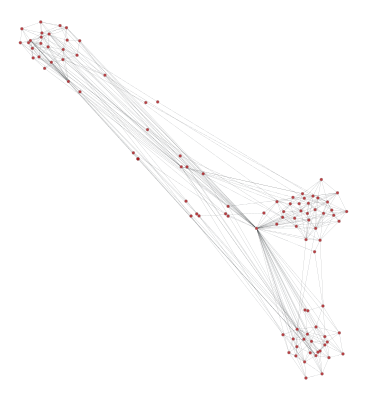

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fc7946954c0, at 0x7fc794687490>

In [174]:
graph_draw(gngu.g, pos=gngu.g.vp.pos, output_size=(200, 200), vertex_size=1.5, edge_pen_width=0.05)

In [176]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')